In [11]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))
from src.data_loader.load_data import load_portfolio_data
from src.tests.ab_tests import preprocess_data, prepare_ab_groups,calculate_margin,test_margin_difference, plot_metric_by_group

In [12]:
# Load data
df = load_portfolio_data("../data/MachineLearningRating_v3.txt")
df = preprocess_data(df)

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\data_loader\load_data.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|", parse_dates=['TransactionMonth'])


### Hypothesis 3: Margin Differences Across Zip codes
H₀:There are no significant margin (profit) difference between zip codes 

In [13]:
# --- Select Two Zip Codes to Compare ---
zip_a = 2000
zip_b = 122
# --- Prepare A/B Data (Feature: ZipCode) ---
df_ab = prepare_ab_groups(df, zip_a, zip_b, feature_col="PostalCode")

In [14]:
# --- Margin Calculations ---
margin_a = calculate_margin(df_ab[df_ab["Group"] == "A"])
margin_b = calculate_margin(df_ab[df_ab["Group"] == "B"])

print(f"\nMargin:\n  {zip_a}: {margin_a:.4f} | {zip_b}: {margin_b:.4f}")


Margin:
  2000: 0.5856 | 122: 0.5589


In [15]:
# --- Hypothesis Test ---
p_margin = test_margin_difference(df_ab)

print(f"\n Margin Difference Test p-value: {p_margin:.4f} — {'❌ Fail to Reject' if p_margin > 0.05 else '✅ Reject Null'}")


 Margin Difference Test p-value: 0.6484 — ❌ Fail to Reject


C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


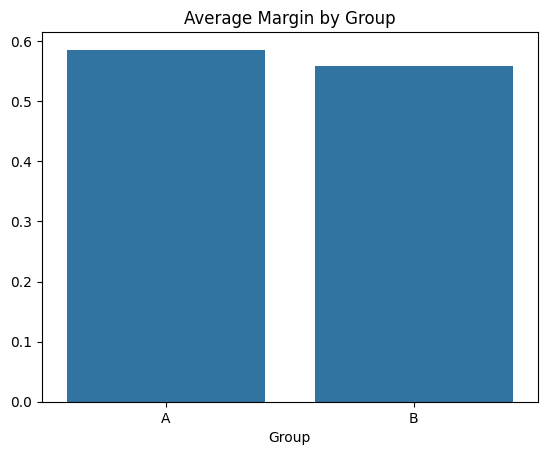

In [16]:
plot_metric_by_group(df_ab, calculate_margin, "Average Margin by Group")

We fail to reject the null hypothesis for postal codes (p = 0.6484). Specifically, the average profit margin in zip code 2000 is 0.9472, compared to 0.9462 in zip code 122 — a marginal difference of less than 0.1%.

This finding suggests that profitability is consistent across these two locations. Since no significant margin difference exists, there is no current need to adjust pricing, underwriting, or expense assumptions based on zip code alone in this case.